In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

plt.style.use('seaborn') #그래프 스타일 Seaborn

In [287]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


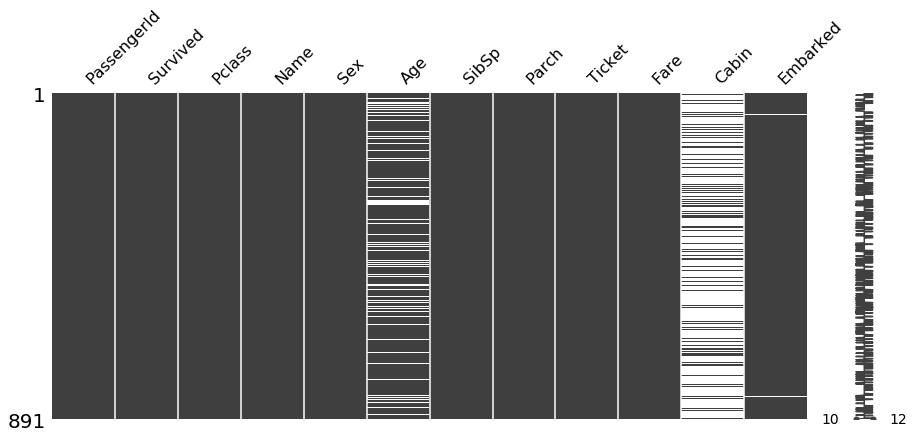

In [6]:
msno.matrix(df_train, figsize=(15,6))

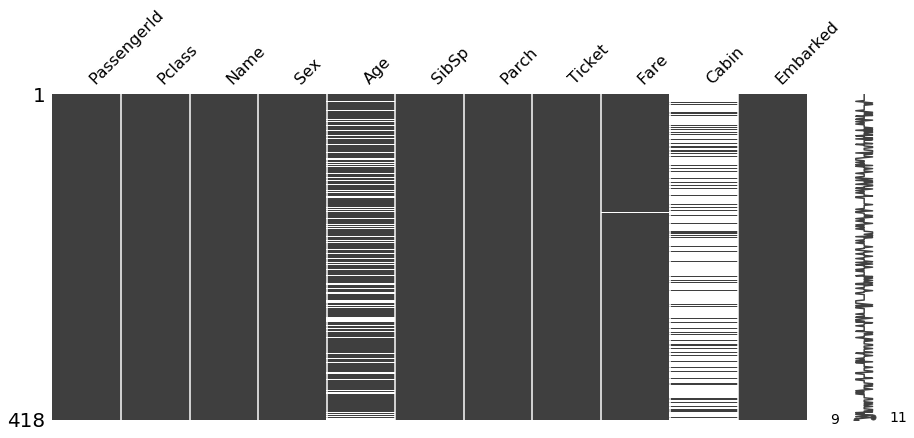

In [7]:
msno.matrix(df_test, figsize=(15,6))

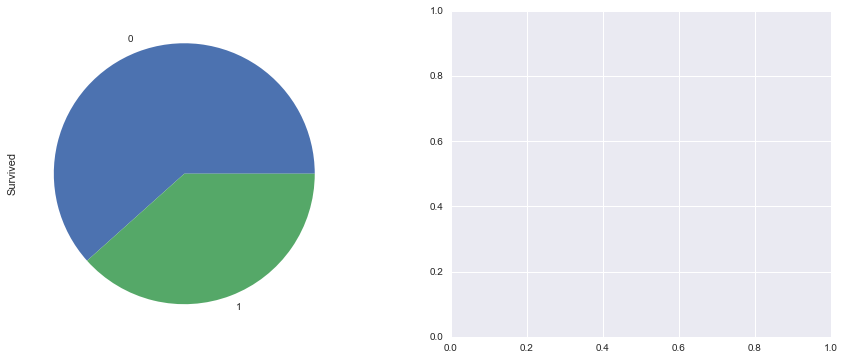

In [29]:
f, ax = plt.subplots(1,2, figsize=(15,6))

df_train['Survived'].value_counts().plot.pie(ax=ax[0])

Text(0.5, 1.0, 'Count plot - Survived')

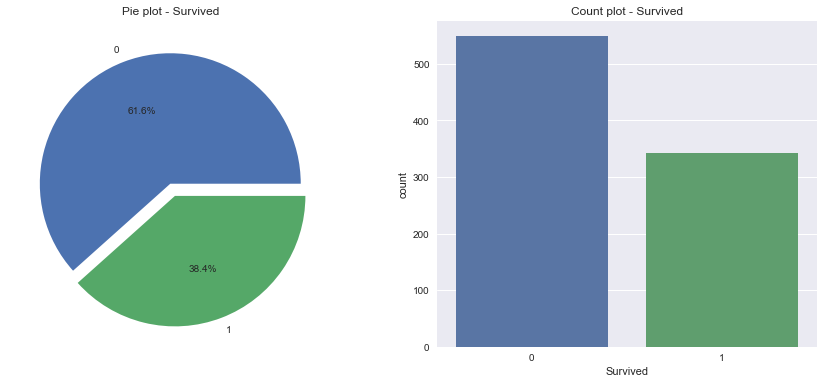

In [28]:
f, ax = plt.subplots(1,2, figsize=(15,6)) #그래프 열로 두개 이어서 그리기, plt.subplots(1,2....)

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0]) #explode는 파이그래프 간격 분리 / autopct는 파이별 % 기재
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1], )
sns.despine(left=True) #최외곽선 삭제 명령어 of seaborn
ax[1].set_title('Count plot - Survived')

In [44]:
df_train.groupby(['Pclass', 'Sex'])[['Survived']].mean() #groupby 사용 방법 1

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [40]:
df_train[['Pclass','Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean() #groupby 사용 방법 2

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [47]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


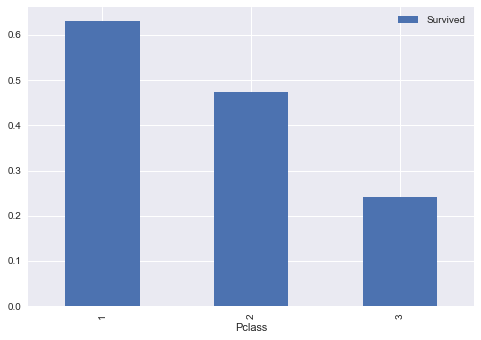

In [57]:
df_train.groupby(['Pclass'])[['Survived']].mean().sort_values(by='Survived', ascending=False).plot.bar()

Text(0.5, 1.1, 'Number of Passenger by Sex')

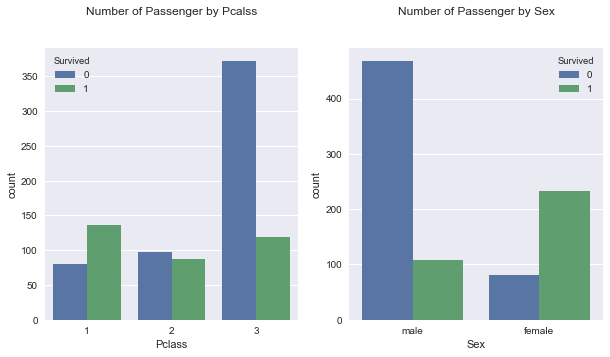

In [66]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[0])
ax[0].set_title('Number of Passenger by Pcalss', y=1.1)
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Number of Passenger by Sex', y=1.1)

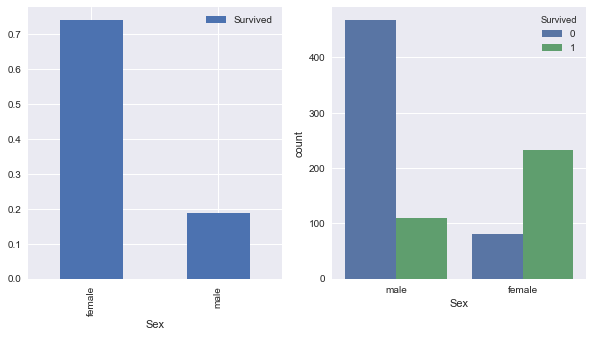

In [76]:
f, ax = plt.subplots(1,2, figsize=(10,5))
df_train.groupby(['Sex'])['Survived'].mean().plot.bar(ax=ax[0])
ax[0].legend()
sns.countplot('Sex', hue='Survived', data=df_train,ax=ax[1])

In [78]:
pd.crosstab(df_train.Sex, df_train.Survived, margins=True).style.background_gradient(cmap='summer_r') #crosstab에 값별로 색을 적용

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


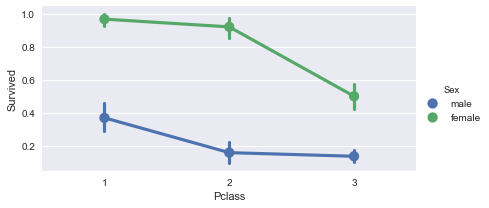

In [87]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=3, aspect=2) #factorplot 처음:X, 두번째:Y , hue 값, data)

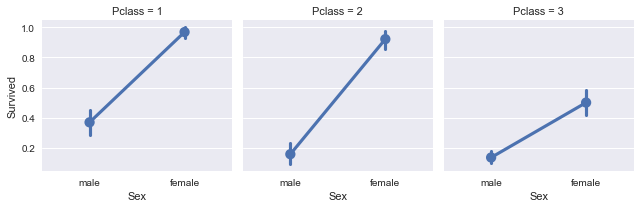

In [89]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, size=3, aspect=1) #factorplot 처음:X, 두번째:Y , hue 값, data)

## ** Age 분석

In [94]:
print('제일나이가 많은 승객 : {:.1f}'.format(df_train['Age'].max()))
print('제일나이가 어린 승객 : {:.1f}'.format(df_train['Age'].min()))
print('승객의 평균 나이 : {:.1f}'.format(df_train['Age'].mean()))

제일나이가 많은 승객 : 80.0
제일나이가 어린 승객 : 0.4
승객의 평균 나이 : 29.7


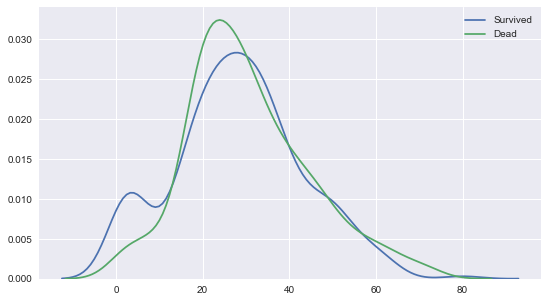

In [98]:
f, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])

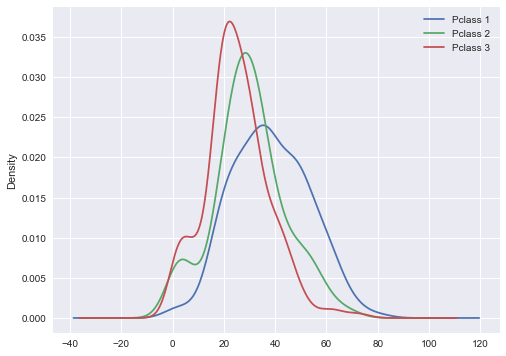

In [106]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.legend(['Pclass 1', 'Pclass 2', 'Pclass 3'])

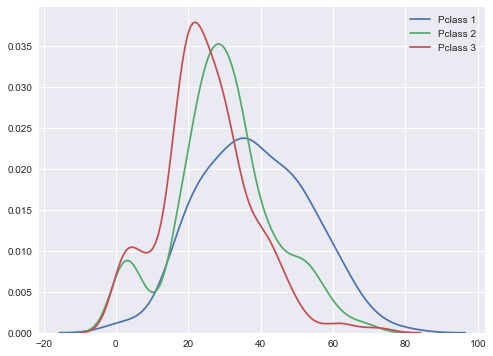

In [105]:
f, ax = plt.subplots(1,1, figsize=(8,6))
sns.kdeplot(df_train[df_train['Pclass']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==2]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==3]['Age'], ax=ax)
plt.legend(['Pclass 1', 'Pclass 2', 'Pclass 3'])

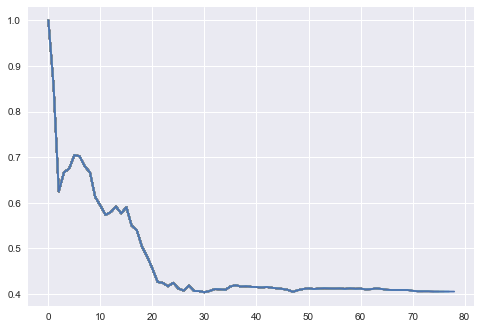

In [128]:
cummulate_survived_raio = []

for i in range(1, 80):
    cummulate_survived_raio.append(df_train[df_train['Age']<i]['Survived'].mean())

    plt.plot(cummulate_survived_raio)

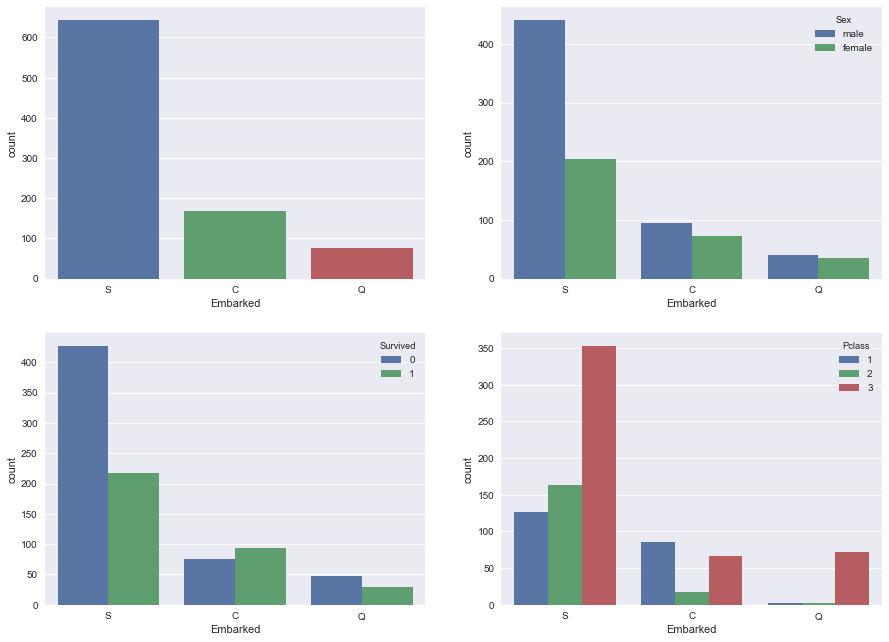

In [135]:
f, ax = plt.subplots(2,2, figsize=(15,11))
sns.countplot('Embarked', data = df_train, ax=ax[0,0])
sns.countplot('Embarked', hue='Sex', data = df_train, ax=ax[0,1])
sns.countplot('Embarked', hue='Survived', data = df_train, ax=ax[1,0])
sns.countplot('Embarked', hue='Pclass', data = df_train, ax=ax[1,1])

In [288]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [139]:
print(df_train['FamilySize'].max())
print(df_train['FamilySize'].min())

11
1


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

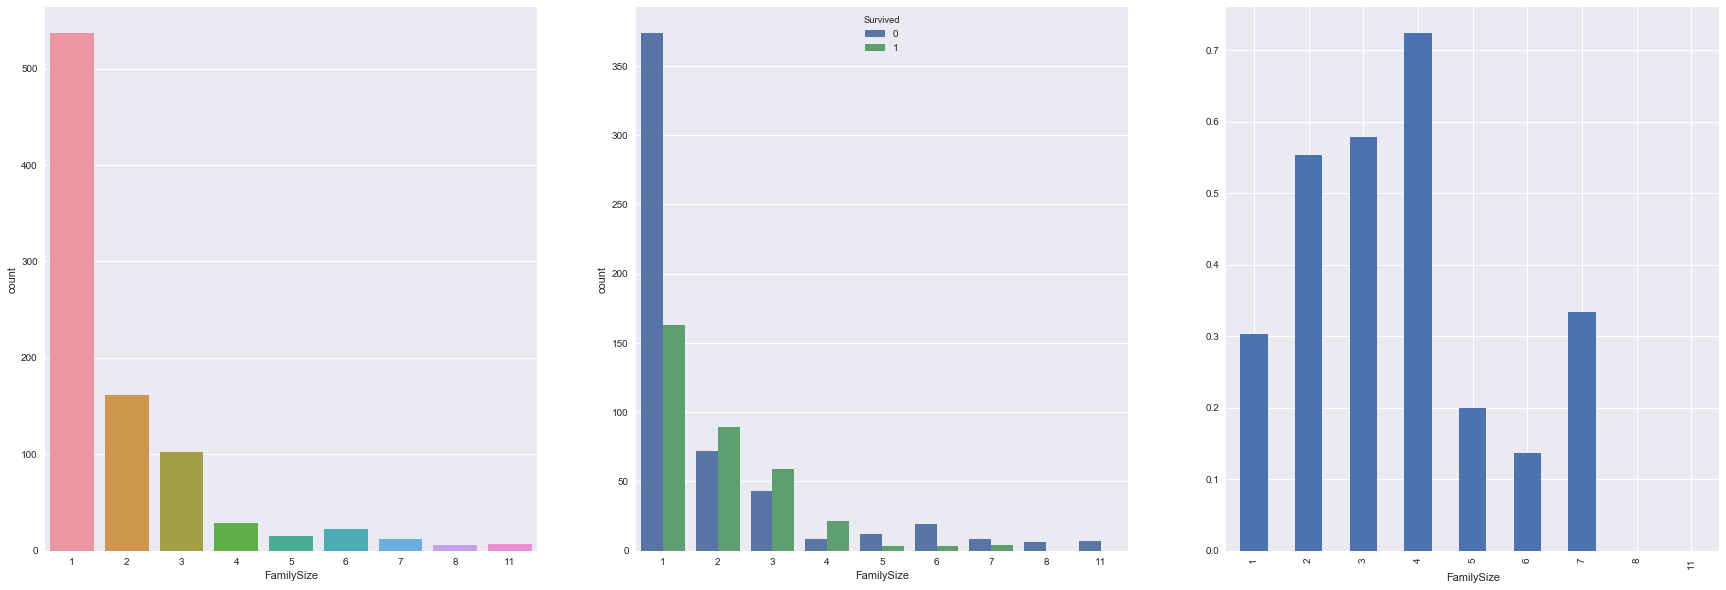

In [147]:
f, ax = plt.subplots(1,3, figsize=(30,10))
sns.countplot('FamilySize', data = df_train, ax=ax[0])
sns.countplot('FamilySize', hue='Survived',data = df_train, ax=ax[1])
df_train.groupby(['FamilySize'])['Survived'].mean().plot.bar(ax=ax[2])
df_train.groupby(['FamilySize'])['Survived'].mean()
# sns.countplot(df_train.groupby(['FamilySize'])['Survived'].mean(), data = df_train, ax=ax[2]) <-- 이게 안됨




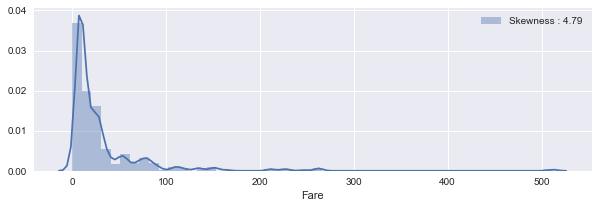

In [152]:
plt.figure(figsize=(10,3))
g = sns.distplot(df_train['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()))
g = g.legend()

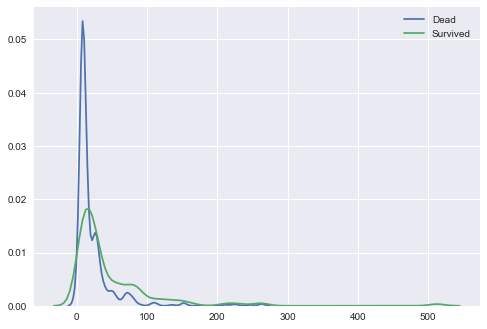

In [157]:
f, ax = plt.subplots(1,1)
sns.kdeplot(df_train[df_train['Survived']==0]['Fare'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==1]['Fare'], ax=ax)
plt.legend(['Dead', 'Survived'])

> Fare 데이터의 값이 차이가 커서 log로 변환해서 분석 진행

In [289]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i >0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i >0 else 0) 

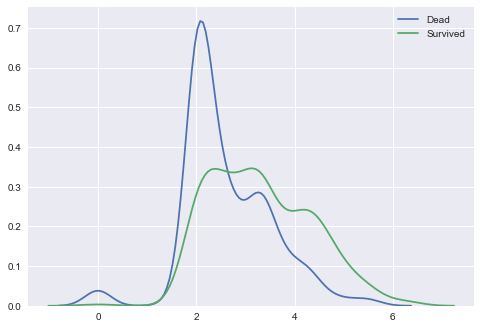

In [290]:
f, ax = plt.subplots(1,1)
sns.kdeplot(df_train[df_train['Survived']==0]['Fare'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==1]['Fare'], ax=ax)
plt.legend(['Dead', 'Survived'])

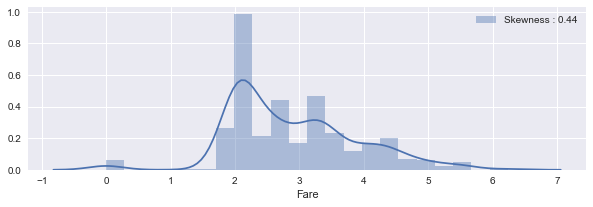

In [166]:
plt.figure(figsize=(10,3))
g = sns.distplot(df_train['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()))
g = g.legend()

In [175]:
(df_train['Cabin'].isna()==True).value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [291]:
df_train['Cabin'] = (df_train['Cabin'].isnull()==True).map({True:0, False:1})

In [292]:
df_test['Cabin'] = (df_test['Cabin'].isnull()==True).map({True:0, False:1})

In [182]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,1,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,1,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,0,S,1


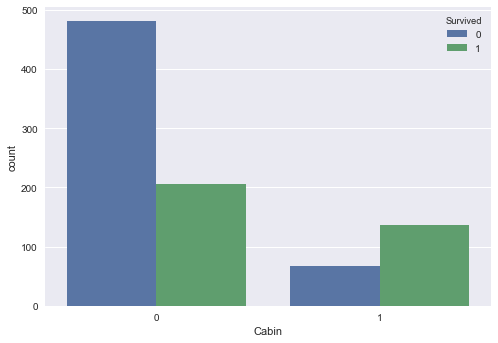

In [183]:
sns.countplot('Cabin', hue='Survived', data=df_train)

### 이름에서 Title 추출

In [293]:
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [294]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,0,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,1,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,1,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,0,S,1,Mr


In [196]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Ms            1
Lady          1
Name: Title, dtype: int64

In [295]:
df_train['Title'].replace(['Mr', 'Miss','Mrs','Master','Dr','Rev','Mlle','Major','Col','Jonkheer','Sir','Mme','Don','Capt','Countess','Ms','Lady'],
                         ['Mr', 'Miss','Mrs','other', 'Mr','other','other','other','other','other','other','other','other','other','other','Mrs', 'Miss'],
                         inplace=True)

In [296]:
df_test['Title'].replace(['Mr', 'Miss','Mrs','Master','Dr','Rev','Mlle','Major','Col','Jonkheer','Sir','Mme','Don','Capt','Countess','Ms','Lady','Dona'],
                         ['Mr', 'Miss','Mrs','other', 'Mr','other','other','other','other','other','other','other','other','other','other','Mrs', 'Miss','other'],
                         inplace=True)

In [297]:
df_train['Title'].value_counts()

Mr       524
Miss     183
Mrs      126
other     58
Name: Title, dtype: int64

In [298]:
df_test['Title'].value_counts()

Mr       241
Miss      78
Mrs       73
other     26
Name: Title, dtype: int64

In [299]:
df_train.groupby(['Title', 'Sex'])[['Age']].count()

Age
Title Sex        
Miss  female  147
Mr    female    1
      male    403
Mrs   female  109
other female    4
      male     50

In [300]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       889 non-null object
FamilySize     891 non-null int64
Title          891 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [314]:
df_train.loc[(df_train['Title']=='Mr') & (df_train['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title


In [305]:
df_train.iloc[796]

PassengerId                            797
Survived                                 1
Pclass                                   1
Name           Leader, Dr. Alice (Farnham)
Sex                                 female
Age                                     49
SibSp                                    0
Parch                                    0
Ticket                               17465
Fare                               3.25537
Cabin                                    1
Embarked                                 S
FamilySize                               1
Title                                   Mr
Name: 796, dtype: object

In [313]:
df_train['Title'].iloc[796] = 'Mrs' #특정 Cell의 값을 변경

In [275]:
# df_train['Title'][796] = df_train.loc[(df_train['Title']=='Mr')&(df_train['Sex']=='female')].replace({'Mr':'Mrs'})

In [315]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,0,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,1,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,1,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,0,S,1,Mr


In [317]:
df_train.groupby(['Title', 'Sex'])[['Age']].count()

Age
Title Sex        
Miss  female  147
Mr    male    403
Mrs   female  110
other female    4
      male     50

In [318]:
df_test.groupby(['Title', 'Sex'])[['Age']].count()

Age
Title Sex        
Miss  female   64
Mr    male    184
Mrs   female   62
other female    1
      male     21

In [319]:
df_train.drop(columns='Name', axis=1, inplace=True)
df_test.drop(columns='Name', axis=1, inplace=True)

In [320]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,1.981001,0,S,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,4.266662,1,C,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1,Miss
3,4,1,1,female,35.0,1,0,113803,3.972177,1,S,2,Mrs
4,5,0,3,male,35.0,0,0,373450,2.085672,0,S,1,Mr


In [321]:
df_train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,FamilySize
Title,,,,,,,,,
Miss,409.693989,0.699454,2.300546,21.952381,0.715847,0.546448,3.113364,0.262295,2.262295
Mr,455.066922,0.158700,2.397706,32.470223,0.292543,0.151052,2.640666,0.181644,1.443595
Mrs,455.795276,0.795276,1.992126,35.945455,0.685039,0.818898,3.425494,0.354331,2.503937
other,457.344828,0.517241,2.224138,17.382778,1.637931,0.982759,3.320092,0.275862,3.620690


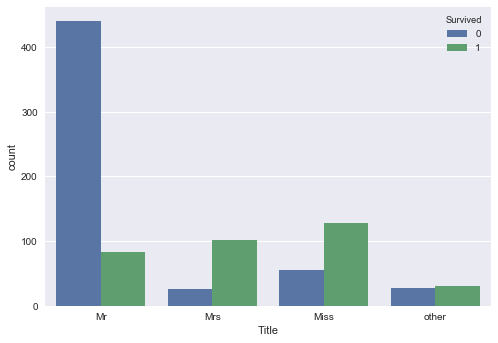

In [322]:
sns.countplot('Title', hue='Survived', data=df_train)

In [324]:
df_train.groupby("Title")["Age"].median()

Title
Miss     21.0
Mr       30.0
Mrs      35.0
other     8.0
Name: Age, dtype: float64

In [325]:
df_test.groupby("Title")["Age"].median()

Title
Miss     22.00
Mr       28.75
Mrs      36.50
other     9.50
Name: Age, dtype: float64

* isnull값 확인 

In [329]:
print(df_train.isnull().sum())
print('-'*100)
print(df_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
FamilySize     0
Title          0
dtype: int64
----------------------------------------------------------------------------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
Title          0
dtype: int64


In [328]:
df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform('median'), inplace=True)
df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'), inplace=True)

In [336]:
pd.qcut(df_train['Age'],6).value_counts()

(24.0, 30.0]     252
(0.419, 19.0]    168
(19.0, 24.0]     149
(40.5, 80.0]     148
(32.0, 40.5]     137
(30.0, 32.0]      37
Name: Age, dtype: int64

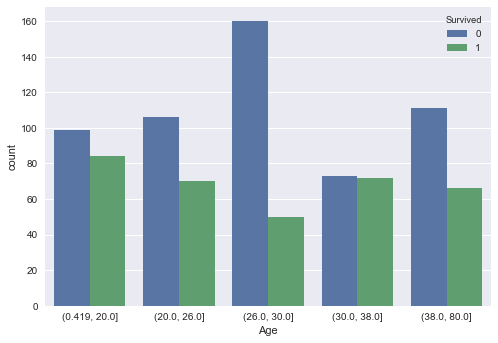

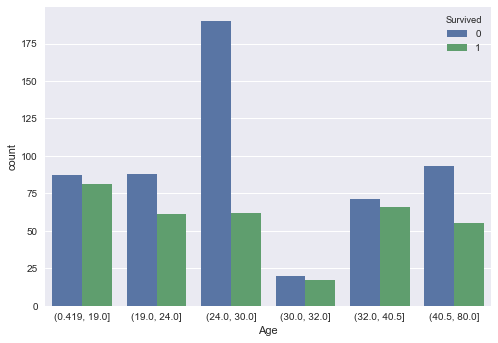

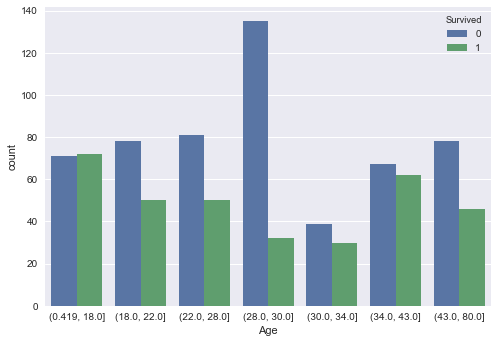

In [345]:
sns.countplot(pd.qcut(df_train['Age'],5), hue='Survived', data=df_train)
plt.show()
sns.countplot(pd.qcut(df_train['Age'],6), hue='Survived', data=df_train)
plt.show()
sns.countplot(pd.qcut(df_train['Age'],7), hue='Survived', data=df_train)
plt.show()

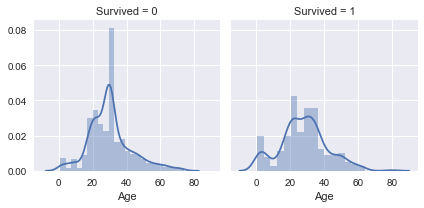

In [346]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age')

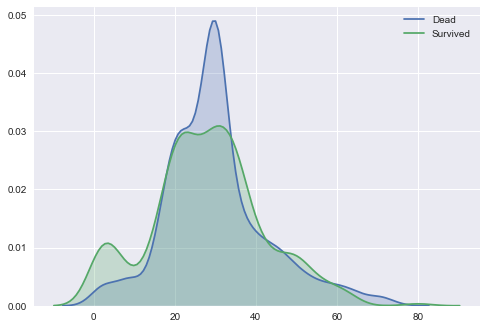

In [358]:
f, ax = plt.subplots(1,1)
sns.kdeplot(df_train['Age'][df_train['Survived']==0], shade=True)
sns.kdeplot(df_train['Age'][df_train['Survived']==1], shade=True)
plt.legend(['Dead', 'Survived'])

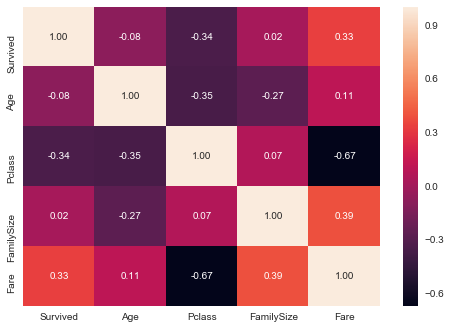

In [359]:
sns.heatmap(df_train[['Survived', 'Age', 'Sex', 'Pclass', 'FamilySize', 'Fare']].corr(), annot=True, fmt='.2f')

In [360]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,1.981001,0,S,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,4.266662,1,C,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1,Miss
3,4,1,1,female,35.0,1,0,113803,3.972177,1,S,2,Mrs
4,5,0,3,male,35.0,0,0,373450,2.085672,0,S,1,Mr


In [361]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})

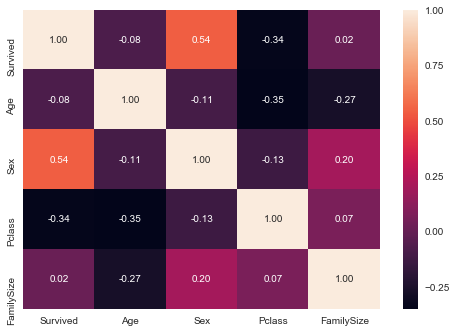

In [363]:
sns.heatmap(df_train[['Survived', 'Age', 'Sex', 'Pclass', 'FamilySize']].corr(), annot=True, fmt='.2f')

In [365]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,0,22.0,1,0,A/5 21171,1.981001,0,S,2,Mr
1,2,1,1,1,38.0,1,0,PC 17599,4.266662,1,C,2,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1,Miss
3,4,1,1,1,35.0,1,0,113803,3.972177,1,S,2,Mrs
4,5,0,3,0,35.0,0,0,373450,2.085672,0,S,1,Mr


In [366]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [367]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [384]:
df_train['Embarked'].fillna('S', inplace=True)

In [386]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,0,22.0,1,0,A/5 21171,1.981001,0,S,2,Mr
1,2,1,1,1,38.0,1,0,PC 17599,4.266662,1,C,2,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,2.070022,0,S,1,Miss
3,4,1,1,1,35.0,1,0,113803,3.972177,1,S,2,Mrs
4,5,0,3,0,35.0,0,0,373450,2.085672,0,S,1,Mr
